# Plots/histograms for color and pixel intensity

In [1]:
# these commands make the imports reload every time you run the cell, so don't have to do kernel restart
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from utils import load_split_images, plot_color_histogram, get_mean_intensity_rgb, get_mean_intensity_grayscale

In [2]:
train, val, test = load_split_images('../OfficeCaltechDomainAdaptation/images/')

In [3]:
np.unique(train[1])

array(['backpack', 'bike', 'calculator', 'headphones', 'keyboard',
       'laptop', 'monitor', 'mouse', 'mug', 'projector'], dtype='<U10')

### Visualizing Sample Images

backpack


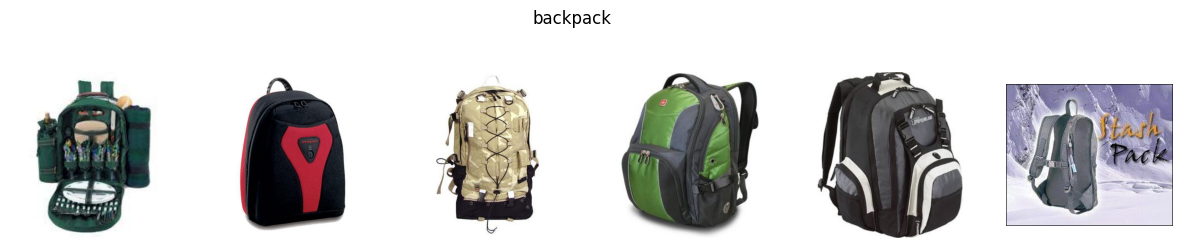

bike


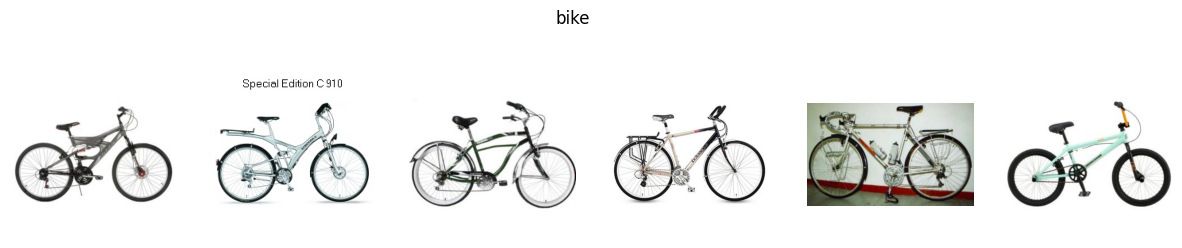

calculator


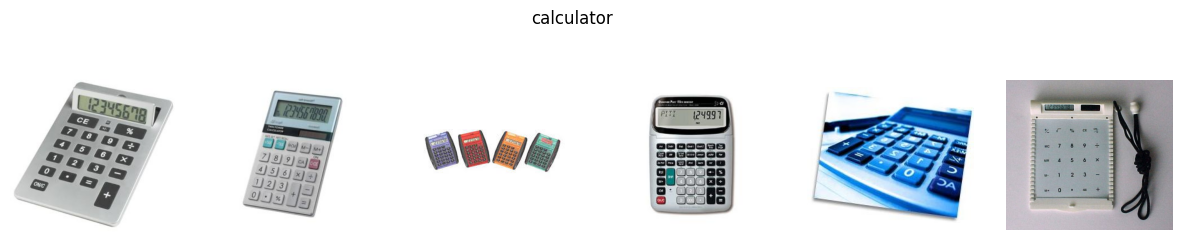

headphones


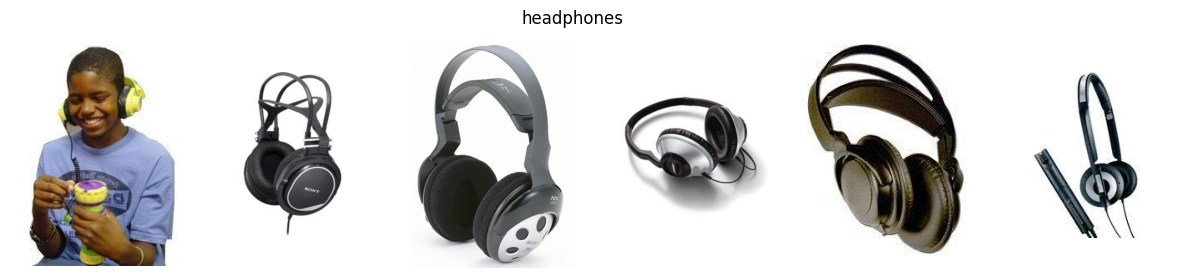

keyboard


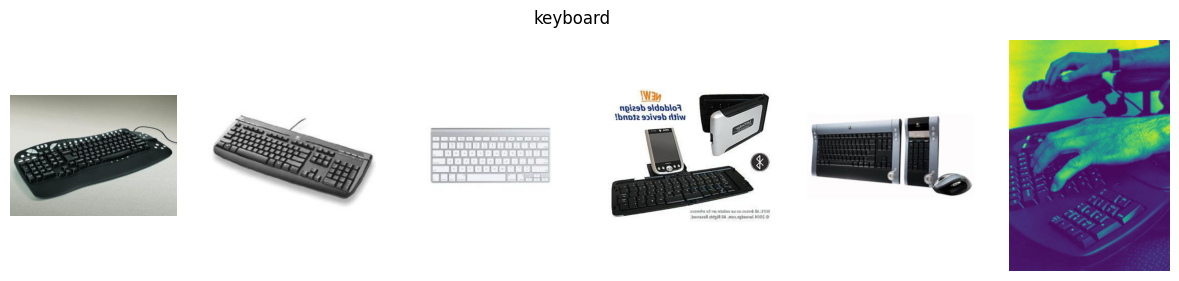

laptop


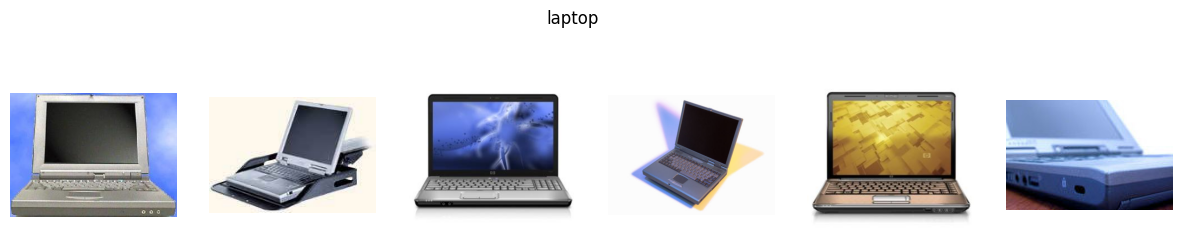

monitor


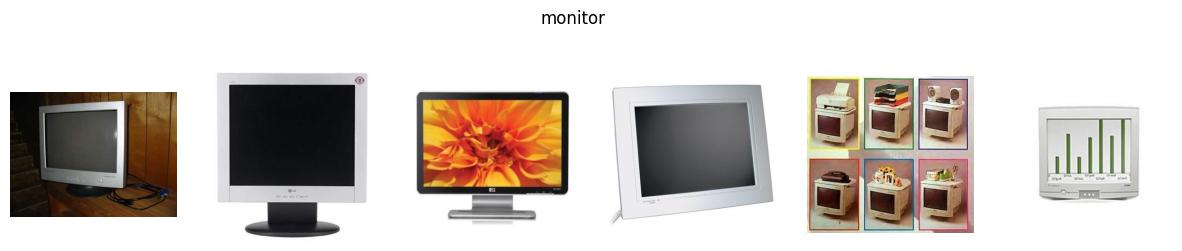

mouse


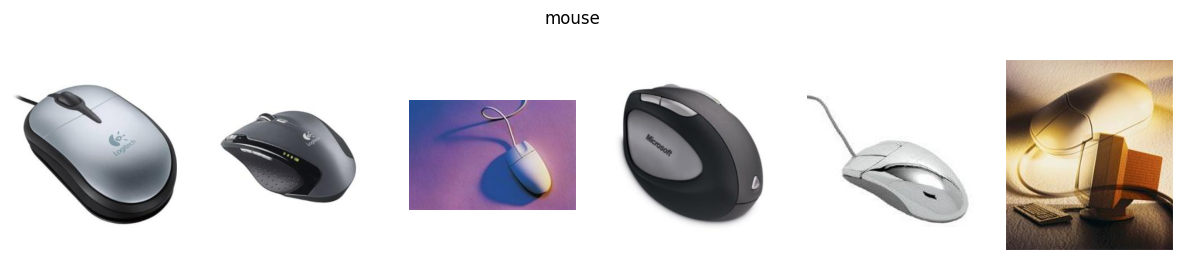

mug


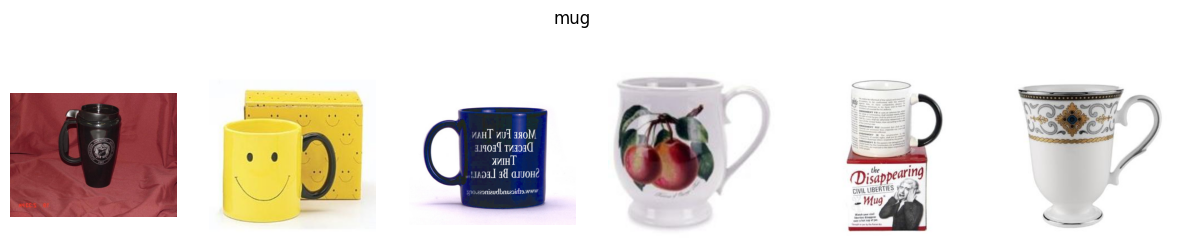

projector


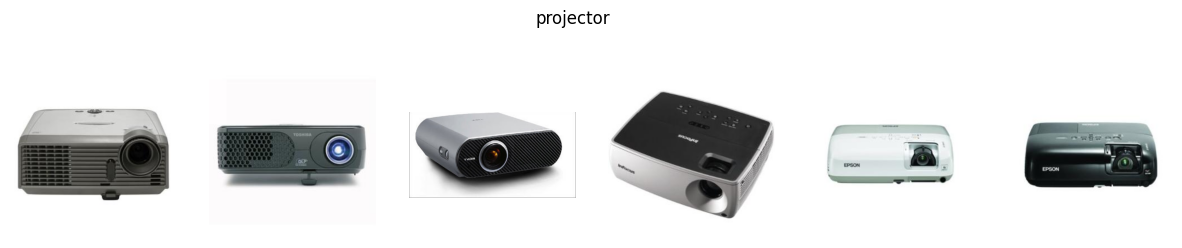

In [4]:
for label in np.unique(train[1]):
    print(label)
    sample_size = 6
    cur_label_idx = np.arange(len(train[1]))[train[1] == label]
    sample_idx = np.random.choice(cur_label_idx, sample_size)
    
    imgs = [train[3][i] for i in sample_idx]
    
    fig, axes = plt.subplots(1, sample_size, figsize=(15, 3))
    fig.suptitle(label)
    
    for ax, img in zip(axes.flatten(), imgs):
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()

### Color Histograms
A function that can produce a plot for the color intensity distribution for an image. 

plots the histogram, then returns the mean median and mode intensity of each color channel

This shows promise, they are all very distinct, but we probably will want to remove the all-white background on the amazon images. im skeptical that the color distribution will stay consistent between train and test sets unless we isolate the 

****************************************************************************************************
backpack
total "backpack" images in train: 243
len(imgs) = 243
Mean red intensity: 155.02
Mean green intensity: 148.68
Mean blue intensity: 149.73
Mean grayscale intensity: 149.72


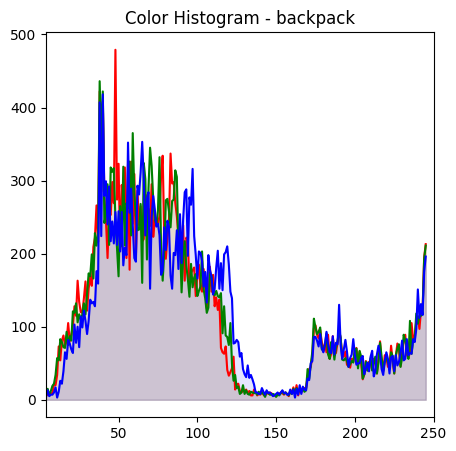

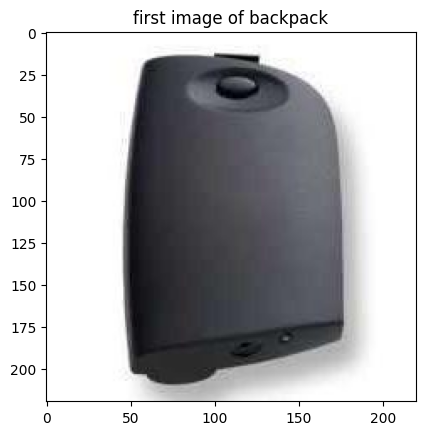

****************************************************************************************************
bike
total "bike" images in train: 192
len(imgs) = 192
Mean red intensity: 184.28
Mean green intensity: 183.29
Mean blue intensity: 179.59
Mean grayscale intensity: 182.29


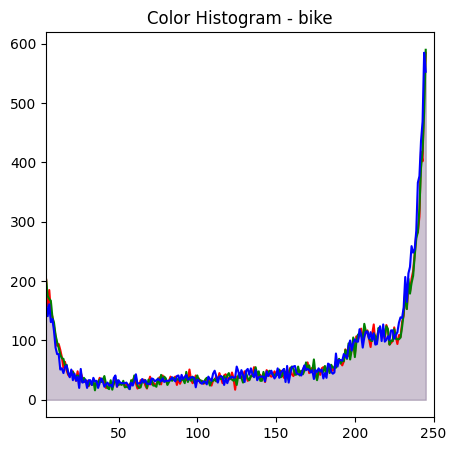

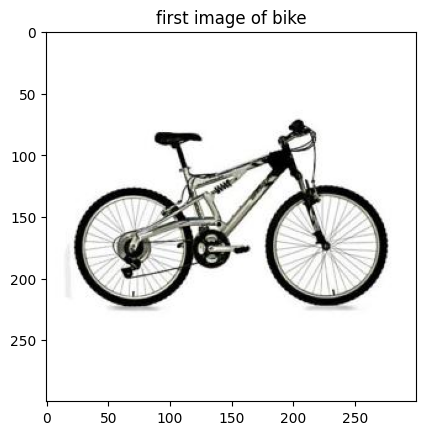

****************************************************************************************************
calculator
total "calculator" images in train: 194
len(imgs) = 194
Mean red intensity: 186.1
Mean green intensity: 185.92
Mean blue intensity: 187.04
Mean grayscale intensity: 186.27


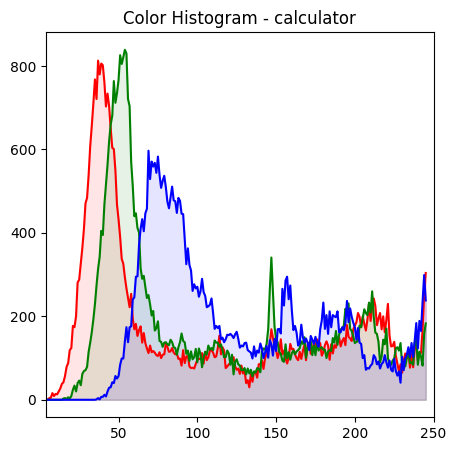

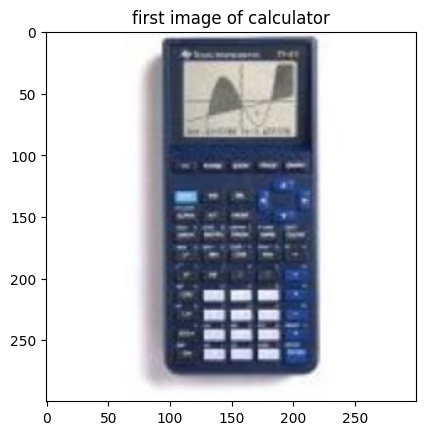

****************************************************************************************************
headphones
total "headphones" images in train: 237
len(imgs) = 237
Mean red intensity: 192.63
Mean green intensity: 191.04
Mean blue intensity: 190.47
Mean grayscale intensity: 191.02


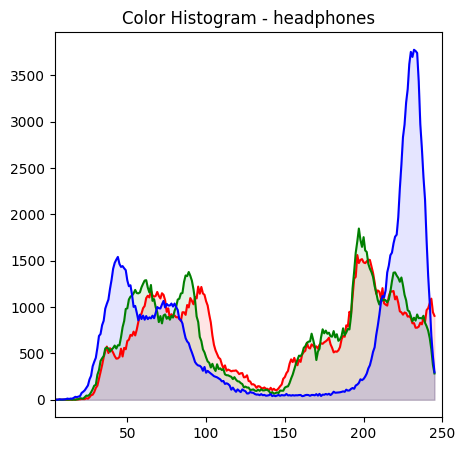

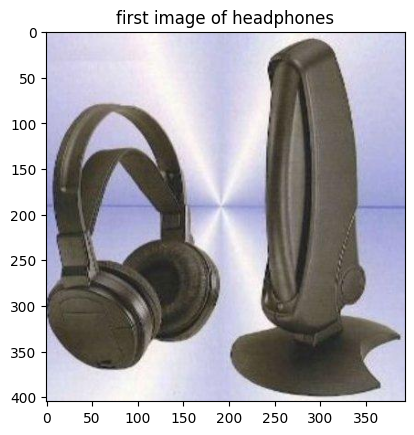

****************************************************************************************************
keyboard
total "keyboard" images in train: 185
len(imgs) = 185
Mean red intensity: 188.42
Mean green intensity: 186.2
Mean blue intensity: 186.23
Mean grayscale intensity: 185.84


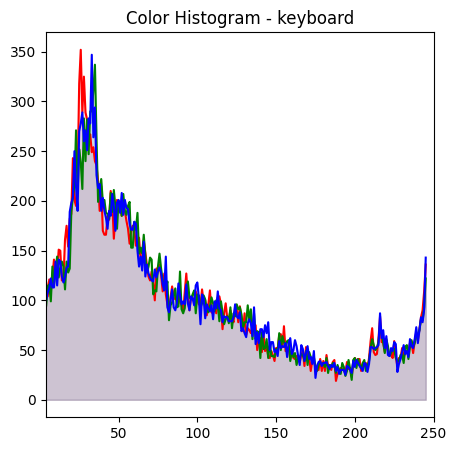

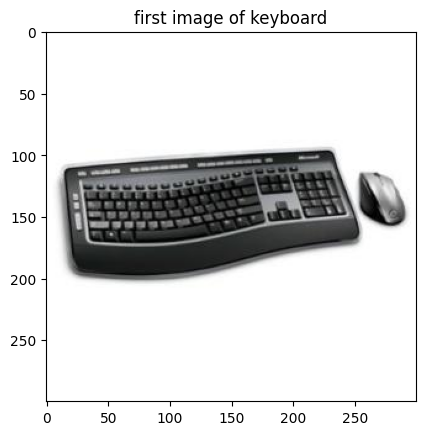

****************************************************************************************************
laptop
total "laptop" images in train: 228
len(imgs) = 228
Mean red intensity: 161.12
Mean green intensity: 160.88
Mean blue intensity: 161.38
Mean grayscale intensity: 160.95


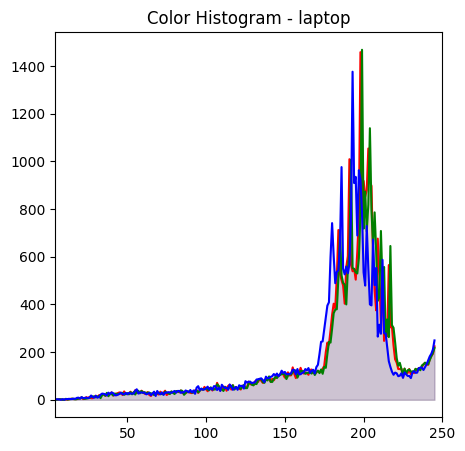

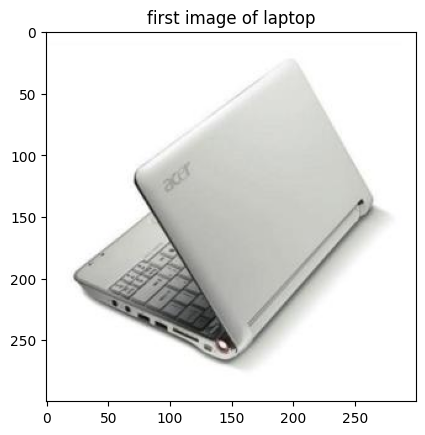

****************************************************************************************************
monitor
total "monitor" images in train: 232
len(imgs) = 232
Mean red intensity: 163.33
Mean green intensity: 166.34
Mean blue intensity: 167.49
Mean grayscale intensity: 166.34


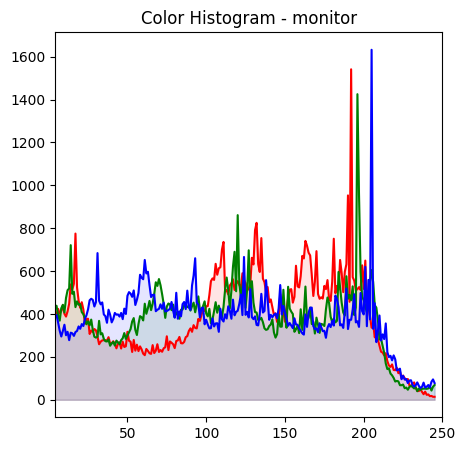

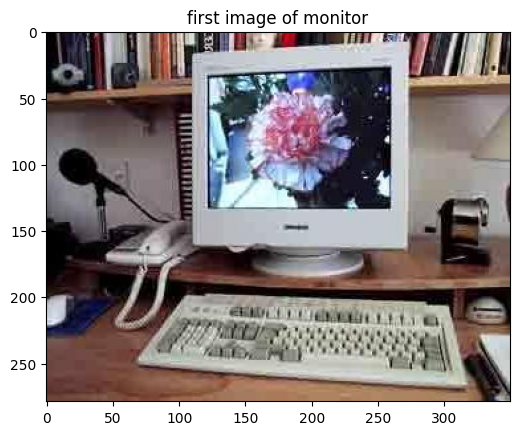

****************************************************************************************************
mouse
total "mouse" images in train: 194
len(imgs) = 194
Mean red intensity: 184.2
Mean green intensity: 181.94
Mean blue intensity: 184.97
Mean grayscale intensity: 183.11


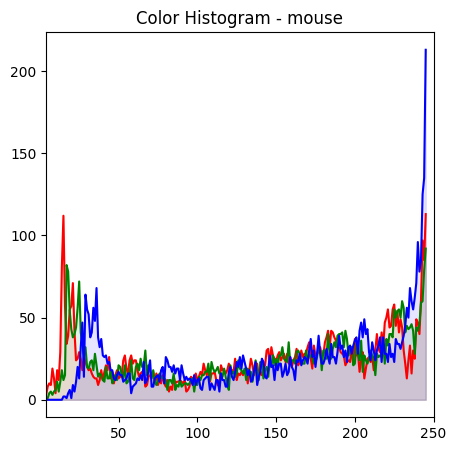

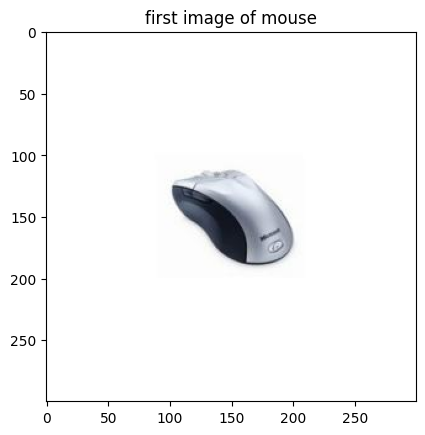

****************************************************************************************************
mug
total "mug" images in train: 181
len(imgs) = 181
Mean red intensity: 190.13
Mean green intensity: 182.06
Mean blue intensity: 178.77
Mean grayscale intensity: 182.0


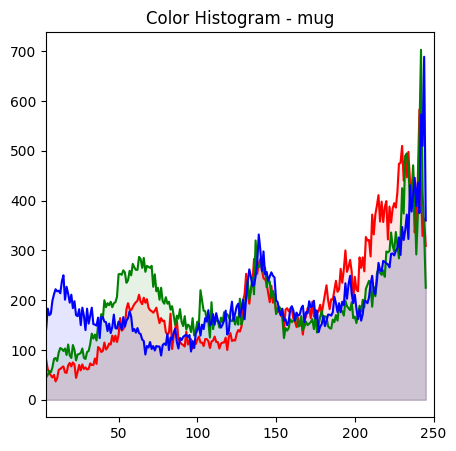

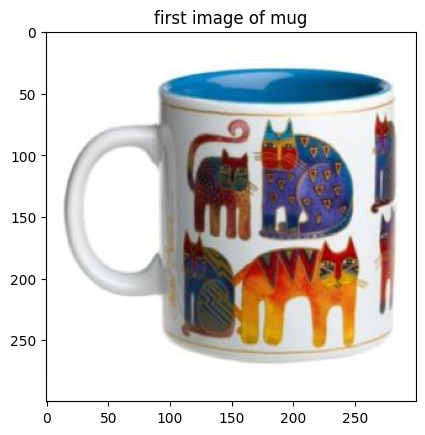

****************************************************************************************************
projector
total "projector" images in train: 195
len(imgs) = 195
Mean red intensity: 194.34
Mean green intensity: 195.0
Mean blue intensity: 196.07
Mean grayscale intensity: 195.25


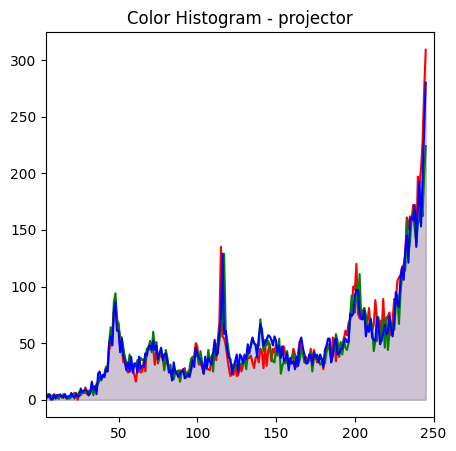

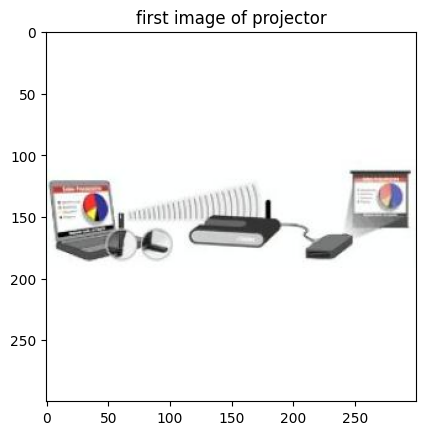

In [5]:
from utils import *

# np.random.seed(888)

############################################
# EXAMPLE USAGE
############################################
for label in np.unique(train[1]):
    print("**"*50)
    print(label)

    # get the indices of the images in train data set with the current label
    cur_label_idx = np.arange(len(train[1]))[train[1] == label]
    print(f'total "{label}" images in train:', cur_label_idx.size)

    # randomly select a sample of images from train with the current label
    sample_size = 1000
    sample_idx = np.random.choice(cur_label_idx, min(sample_size, cur_label_idx.size), replace=False)
    imgs = [train[3][i] for i in sample_idx]
    # imgs = [train[3][i] for i in cur_label_idx]
    print(f"{len(imgs) = }")

    mean_r, mean_g, mean_b = get_mean_intensity_rgb(imgs)
    mean_gray = get_mean_intensity_grayscale(imgs)
    print(f'Mean red intensity: {mean_r}')
    print(f'Mean green intensity: {mean_g}')
    print(f'Mean blue intensity: {mean_b}')    
    print(f'Mean grayscale intensity: {mean_gray}')

    fig1 = plot_color_histogram(imgs, label, intensity_filter=[4,250])
    plt.show(fig1)
    fig2 = plt.imshow(imgs[0])
    plt.title(f'first image of {label}')
    plt.show(fig2)
